# Data analysis and Logistic Regression project : (Portugese Bank Marketing project) 

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

##### Project introduction: 

In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from direct marketing campaigns (phone calls) of a Portuguese banking institution.

The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

The dataset comes from the UCI Machine Learning repository.

the project will start with some basic data manipulation and analytics tasks. It may also ask you to create some interesting visualisation. Later on we will build a simple logistic model by selecting some very specific variable to udnerstand the customer conversion probability as an out come of the marketing campaign


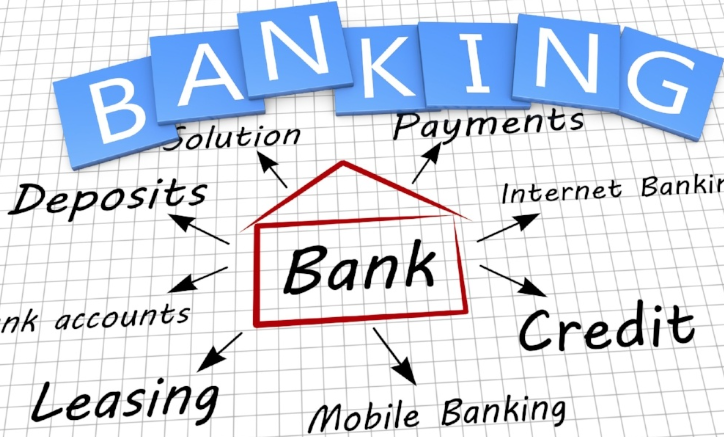


In [1]:
#Load data :
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



### Q1. Read the data "bank.csv" as provided and then store the csv file udner a dataframe named as  bank_df. Return the final dataframe (*)

In [2]:
def read_bank_df():
    ##Your code here 
    df=pd.read_csv("C:/Users/KINSUK/Desktop/DS_Teaching/imocha_assignment/Logistic_regression_project/banking.csv")
    return df

bank_df=read_bank_df()

bank_df.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,campaign,pdays,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,yes,cellular,aug,thu,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,cellular,nov,fri,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,cellular,jun,thu,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,cellular,apr,fri,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,cellular,aug,fri,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Q2. Report the length and widht of the data in terms of rows and columns : (**) 

In [7]:
def length_data():
    # YOUR CODE HERE
    return bank_df.shape[0]

length_data()

10000

In [8]:
def width_data():
    # YOUR CODE HERE
    return bank_df.shape[1]
width_data()

18

In [9]:
## Test Case : 
assert 10000 == length_data()

In [10]:
assert 18 == width_data()

### Q3.Then count number of categorical variables in the data frame ? (**)

In [12]:
def count_categ () :
     # YOUR CODE HERE
    return bank_df.dtypes.value_counts()

def report_categ():
    ## Report total number of categorical columns in the data frame boston_df
    return 8

In [14]:
#Test case : 
assert 8 == report_categ()

### Q4. What is the average consumer price index (cons.price.idx) for married people segment in this data ? (**) 

In [20]:
def avg_cons_price_male () :
     # YOUR CODE HERE
    return bank_df[bank_df['marital']=='married']['cons_price_idx'].mean()
avg_cons_price_male()

93.60550389653673

In [19]:
#Test case : 
assert 93.60550389653673 == report_categ()

93.60550389653673

### Q5. Count the number of observations based on different education levels and report the education level which has the highest number of observations ? (**)

In [21]:
def highest_edu_count () :
     # YOUR CODE HERE
        edu_count=bank_df.groupby('education').size().reset_index(name='counts')
        return edu_count[edu_count['counts']==edu_count['counts'].max()]['education'].values
    
highest_edu_count()

array(['university.degree'], dtype=object)

In [22]:
#Test case : 
assert 'university.degree' == highest_edu_count()

### Q6. Report the month which saw highest number of conversions. (**)

(Tip : Group by months and sum the y. Report the month which gives you the highest sum of y )

In [29]:
def highest_conversion_mth () :
     # YOUR CODE HERE
        month_conversion=bank_df.groupby('month').agg({'y':'sum'}).rename(columns={'y':'conversion'}).reset_index()

        return month_conversion[month_conversion['conversion']==month_conversion['conversion'].max()]['month'].values
    
highest_conversion_mth()

array(['may'], dtype=object)

In [30]:
#Test case : 
assert 'may' == highest_conversion_mth()

### Q7. Report which job segment has the maximum average consumer confidence index ?  (**)

In [32]:
def highest_avg_cons_idx () :
     # YOUR CODE HERE
        cons_idx=bank_df.groupby('job').agg({'cons_conf_idx':'mean'}).rename(columns={'cons_conf_idx':'mean_cons_idx'}).reset_index()

        return cons_idx[cons_idx['mean_cons_idx']==cons_idx['mean_cons_idx'].max()]['job'].values
    
highest_avg_cons_idx()

array(['retired'], dtype=object)

In [33]:
#Test case : 
assert 'retired' == highest_avg_cons_idx()

### Q8. Determine a month on month conversion ratio and report the month where this ratio is highest (**)

N.B : A conversion ratio is number of converts divided by total customers targeted in that month. 

Tip: Group by month --> Calculate total customers targeted --> Calculate total converts --> Determine ratio --> Report 

In [42]:
def highest_conv_rate_mth () :
     # YOUR CODE HERE
        month_conversion=bank_df.groupby('month').agg({'y':'sum','contact':'count'}).rename(columns={'y':'conversion','contact':'total_targeted'}).reset_index()
        month_conversion['Pctg_convert']=month_conversion['conversion']/month_conversion['total_targeted']
        return month_conversion[month_conversion['Pctg_convert']==month_conversion['Pctg_convert'].max()]['month'].values

    
highest_conv_rate_mth()

array(['mar'], dtype=object)

In [43]:
#Test case : 
assert 'mar' == highest_conv_rate_mth()

### Q9. using concept from the previous problem let's now try to plot the month wise conversion rate using a bar chart (**)

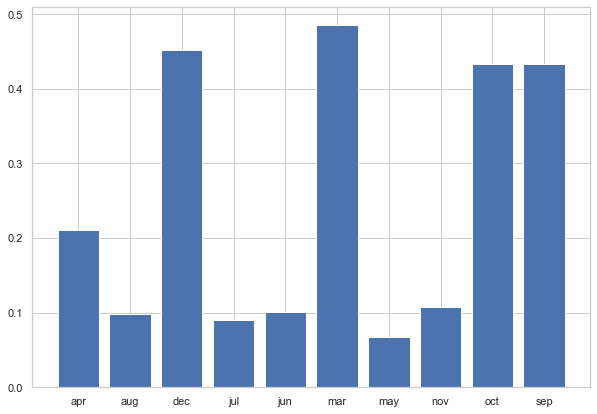

In [11]:
def plot_conv_rate () :
    import matplotlib.pyplot as plt
    # Figure Size
    fig = plt.figure(figsize =(10, 7))
     # YOUR CODE HERE
    month_conversion=bank_df.groupby('month').agg({'y':'sum','contact':'count'}).rename(columns={'y':'conversion','contact':'total_targeted'}).reset_index()
    month_conversion['Pctg_convert']=month_conversion['conversion']/month_conversion['total_targeted']
    df_plt=month_conversion[['month','Pctg_convert']]
    return  plt.bar(df_plt['month'], df_plt['Pctg_convert'])

    
plot_conv_rate()
# Show Plot
plt.show()

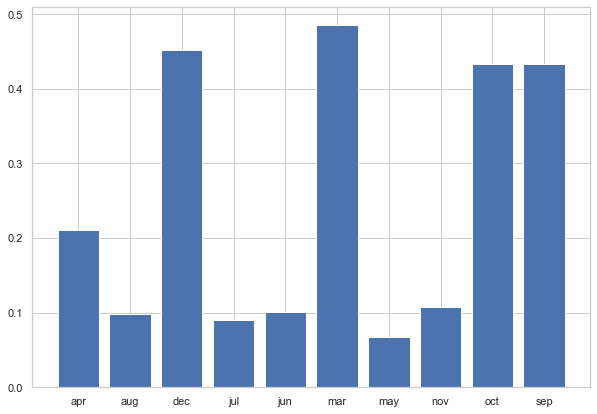

In [23]:
#Test case : 
### BEGIN HIDDEN TEST CASE
from plotchecker import BarPlotChecker

month_conversion=bank_df.groupby('month').agg({'y':'sum','contact':'count'}).rename(columns={'y':'conversion','contact':'total_targeted'}).reset_index()
month_conversion['Pctg_convert']=month_conversion['conversion']/month_conversion['total_targeted']
df_plt=month_conversion[['month','Pctg_convert']]

pc = BarPlotChecker(plot_conv_rate())
pc.assert_heights_equal(df_plt['Pctg_convert'].values)

### Q10. Determine the difference of average duration between the converted group and non converted group  (**)

In [5]:
def avg_duration_diff () :
     # YOUR CODE HERE
        df_dur=bank_df.groupby('y').aggregate({'duration':'mean'}).reset_index()
        return df_dur.iloc[1,1]-df_dur.iloc[0,1]
    
    
avg_duration_diff()

317.5661711846835

In [24]:
#Test case : 
assert 317.5661711846835 == avg_duration_diff()


### Q11. Caculate average employment variation rate for different job segments. and then report the segment which has highest average  employment variation rate ? (**)

In [34]:
def highest_avg_emp_var_rate(bank_df) :
     # YOUR CODE HERE
        emp_rate_df=bank_df.groupby('job').agg({'emp_var_rate':'mean'}).rename(columns={'emp_var_rate':'mean_emp_var_rate'}).reset_index()

        return emp_rate_df[emp_rate_df['mean_emp_var_rate']==emp_rate_df['mean_emp_var_rate'].max()]['job'].values
    
highest_avg_emp_var_rate(bank_df)

array(['housemaid'], dtype=object)

In [37]:
#Test case : 
assert 'housemaid' == highest_avg_emp_var_rate(bank_df)

### Q12. Take the data set into consideration and create a new variable 'age_group' which will create 3 buckets of age range. (*)

Group 1 : 15- 40 
Group 2 : 41-65 
Group 3 : 66 above 

Save this data set as df_age_bucket

In [14]:
def func_age_bucket() :
     # YOUR CODE HERE
        df_age_bucket=bank_df.copy()
        df_age_bucket['age_group'] = np.where(df_age_bucket['age']<=40, 'Age_Group_1', 
                        np.where(df_age_bucket['age'] <=65, 'Age_Group_2', 'Age_Group_3'
                           ))
        
        return df_age_bucket
        
    
    
func_age_bucket()

,age,job,marital,education,housing,contact,month,day_of_week,duration,campaign,pdays,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,age_group
0,44,blue-collar,married,basic.4y,yes,cellular,aug,thu,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,Age_Group_2
1,53,technician,married,unknown,no,cellular,nov,fri,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,Age_Group_2
2,28,management,single,university.degree,yes,cellular,jun,thu,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1,Age_Group_1
3,39,services,married,high.school,no,cellular,apr,fri,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,Age_Group_1
4,55,retired,married,basic.4y,yes,cellular,aug,fri,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1,Age_Group_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,57,blue-collar,divorced,basic.4y,yes,cellular,jul,tue,485,1,999,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0,Age_Group_2
9996,36,technician,single,university.degree,no,cellular,aug,fri,148,5,999,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0,Age_Group_1
9997,31,admin.,married,university.degree,no,cellular,aug,thu,36,5,999,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0,Age_Group_1
9998,40,admin.,married,university.degree,yes,telephone,jun,fri,606,5,999,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0,Age_Group_1


In [15]:
df_age_bucket=func_age_bucket()

## Variable selection for Logistic model regression : 

In this section we will first start by giving a briuef on what is logistic regression ; its applications and then we will build a model on this data set by selecting only a few variables to predict the customer conversion possibility

## Whats is logistic regression : 

 - Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.
 - Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.
 - Logistic regression transforms its output using the logistic sigmoid function to return a probability value.
 - The logistic distribution constrains the estimated probabilities to lie between 0 and 1.
 
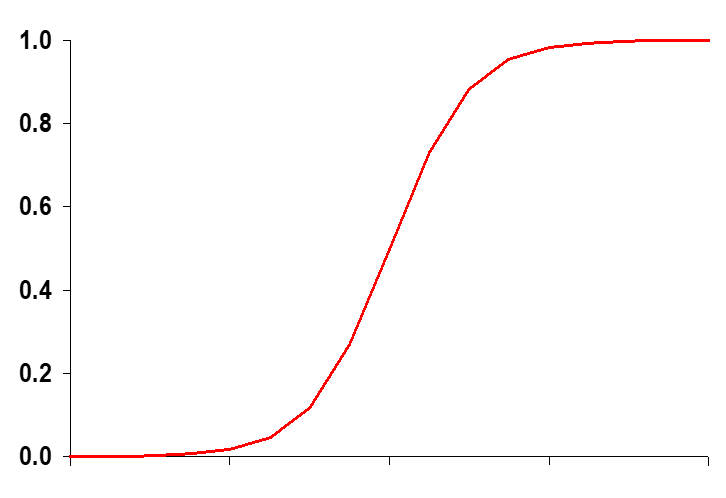
 



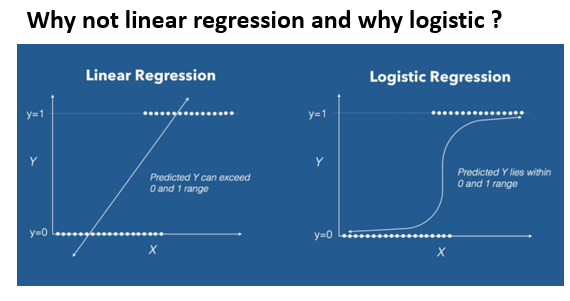

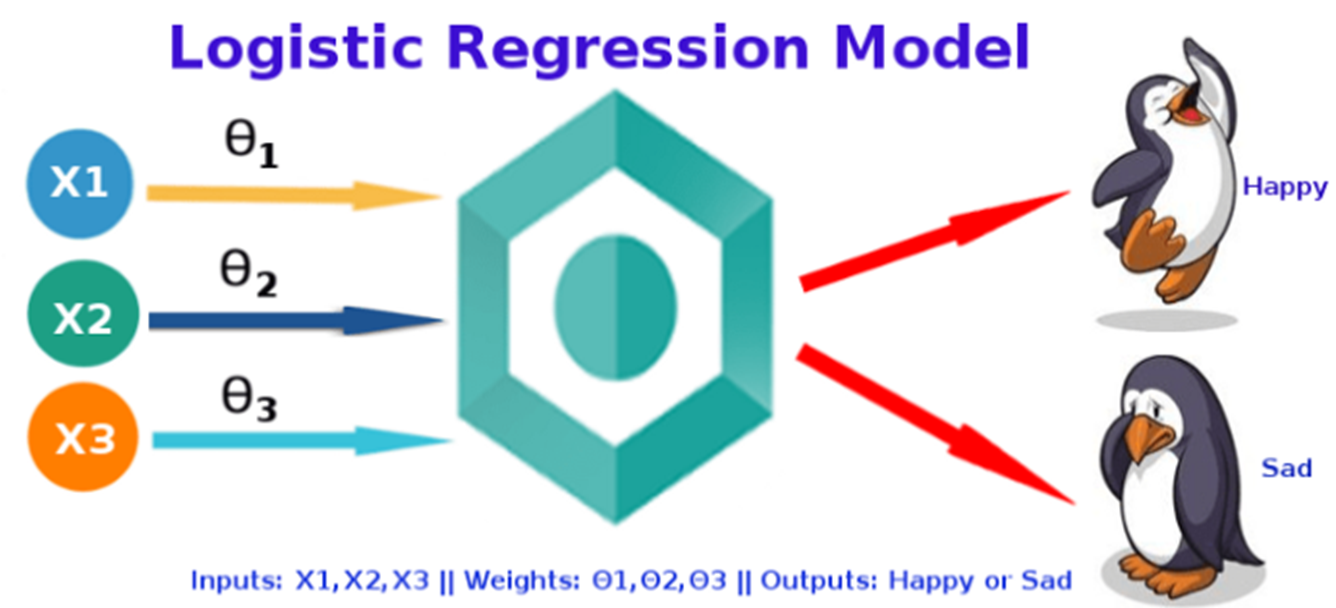

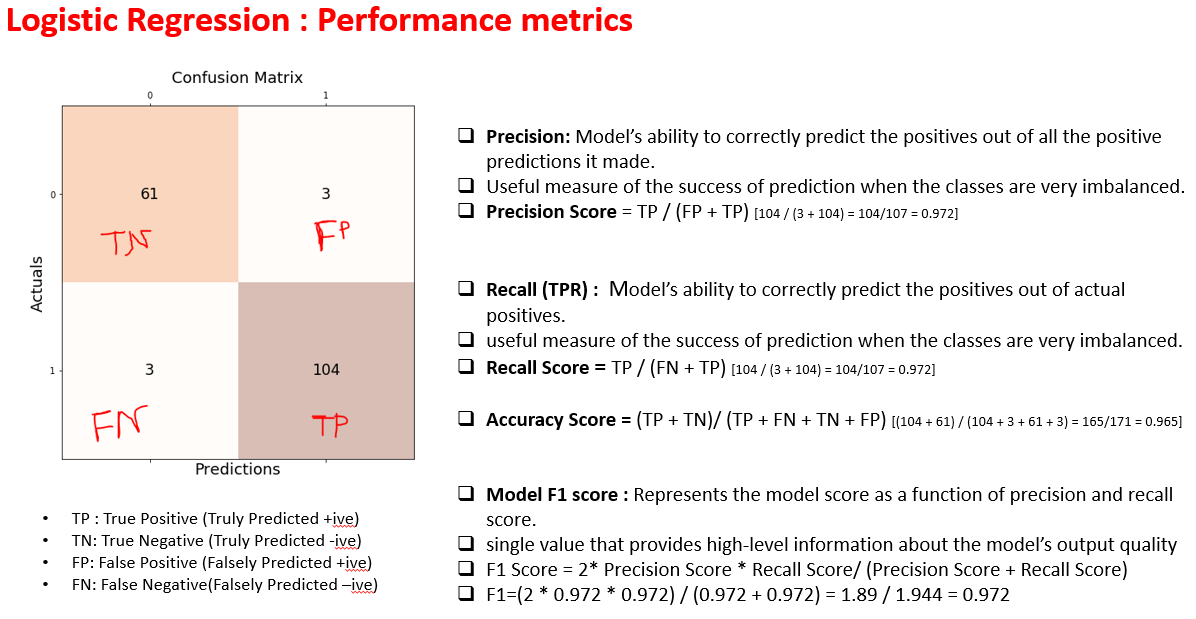

## Q13. From the last data frame 'df_age_bucket' create a subset taking only variables 'Job' ,' month' , 'consumer_price_idx','cons_conf_idx' and 'age_group'.Convert the categorical variables ; i.e. 'Job' ,' month' and 'age_group' into proper binary categorical variables using one hot encoding. (*)

### steps :
    - Create a new data frame from df_age_bucket by only taking the above 5 variables and name it as df_bank_filtered

    - store the df_bank_filtered into a new data frame called df2
    
    - use pd.get_dummies on the categorical variables (i.e. age_group, job and month) to get the final modelling data frame

In [19]:
def create_final_df() :
     # YOUR CODE HERE
        df_bank_filtered=df_age_bucket[['job','month','age_group','cons_price_idx','cons_conf_idx','y']]
        df2 = df_bank_filtered.copy()
        df2 = pd.get_dummies(df2, columns = ['job','month','age_group'])
        return df2     
    
    
create_final_df()

,cons_price_idx,cons_conf_idx,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,age_group_Age_Group_1,age_group_Age_Group_2,age_group_Age_Group_3
0,93.444,-36.1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,93.200,-42.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,94.055,-39.8,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,93.075,-47.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,92.201,-31.4,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93.918,-42.7,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9996,93.444,-36.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9997,93.444,-36.1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9998,94.465,-41.8,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


## Q15. Let's now build our first logostic regression model using all the above variables to predict wthether the customer targeted will be converted or not.

 - store the data obtained in last step under a new data frame named as "final_model_data"
 - Separate the independent (x) and dependent variables (y) 
 - Do a train-test split of 75% : 25% using 'train_test_split' from sklearn and fix random_state=0
 - Post that build the first logstic regression model on the training set 
 - Report the trainign data set accuracy 

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def logistic_model_train_accu() :
     # YOUR CODE HERE
        final_model_data=create_final_df()
        var_list=final_model_data.columns.to_list()
        var_list.remove('y')
        x_train, x_test, y_train, y_test = train_test_split(final_model_data[var_list],final_model_data['y'] , test_size=0.25, random_state=0)
        clf = LogisticRegression(solver='liblinear')
        clf.fit(x_train,y_train)
        ypred_train = clf.predict(x_train)
        ypred_test = clf.predict(x_test)

        # accuracy_score(y_train,ypred_train)
        AR_train =accuracy_score(y_train,ypred_train)
       
        return AR_train  
    
logistic_model_train_accu()

0.888

In [47]:
#Test case : 
assert 0.888 == logistic_model_train_accu()


## Q16. Let's now build and test the model on the testing data set and report the accuracy obtained

In [50]:
def logistic_model_test_accu() :
     # YOUR CODE HERE
        final_model_data=create_final_df()
        var_list=final_model_data.columns.to_list()
        var_list.remove('y')
        x_train, x_test, y_train, y_test = train_test_split(final_model_data[var_list],final_model_data['y'] , test_size=0.25, random_state=0)
        clf = LogisticRegression(solver='liblinear')
        clf.fit(x_train,y_train)
        ypred_test = clf.predict(x_test)

        # accuracy_score(y_train,ypred_train)
        AR_test =accuracy_score(y_test,ypred_test)
       
        return AR_train  
    
logistic_model_test_accu()

0.8788

In [51]:
#Test case : 
assert 0.8788 == logistic_model_test_accu()